#### Activation 使用常用Relu，
#### loss function 改用 categorical_crossentropy(多分類問題)，
#### optimizer 改用 Adadelta，
#### filter選擇 3 X 3
#### pool size 2 X 2 
#### filter 個數取 4、8、16
#### 接dense層 15個神經元
#### 即有約98%的正確率

In [ ]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow  
##確保一致性
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist    #資料庫
from keras.utils import np_utils    #轉為分類問題
from keras.utils import to_categorical 
from keras.models import Sequential #神經網路相關套件  標準
from keras.layers import Dense, Activation, Flatten #flatten為拉平
from keras.layers import Conv2D, MaxPooling2D 
from keras.optimizers import SGD    #隨機調整
from keras.optimizers import Adam
from keras.optimizers import Adadelta
from ipywidgets import interact_manual
from keras.models import Model  #Functional API
from keras.layers import Input  #以函數來代替input_dim  
from keras.layers import concatenate, add  # 用來介接分歧的模型

資料處理

In [81]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   #載入資料
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min()) # 正規化
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())
x_train = x_train.reshape(60000, 28, 28, 1)   # 轉成CNN 的格式 這裡是1維資料
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10) # 轉為分類
y_test = np_utils.to_categorical(y_test, 10)

In [102]:
model = Sequential()

In [103]:
model.add(Conv2D(4, (3, 3), padding='same', input_shape=(28,28,1)))   #第一次 convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))      # max-pooling
model.add(Conv2D(8, (3, 3), padding='same'))   #第二次 convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding='same'))  #第三次 convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())     # 拉平
model.add(Dense(15))     # 接一層 NN   
model.add(Activation('relu'))  
model.add(Dense(10))     #輸出
model.add(Activation('softmax'))

In [108]:
model.compile(loss="categorical_crossentropy",  #多分類問題使用categorical_crossentropy
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
activation_29 (Activation)   (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 8)         296       
_________________________________________________________________
activation_30 (Activation)   (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 16)          1168      
__________

In [114]:
model_1 = model.fit(x_train, y_train, 
                    batch_size=100, 
                    epochs=10, 
                    verbose=1,
                    validation_data =(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 51s 851us/step - loss: 0.1078 - acc: 0.9658 - val_loss: 0.0820 - val_acc: 0.9739
Epoch 2/10
60000/60000 [==============================] - 50s 835us/step - loss: 0.0858 - acc: 0.9721 - val_loss: 0.0654 - val_acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 50s 828us/step - loss: 0.0737 - acc: 0.9764 - val_loss: 0.0600 - val_acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 50s 833us/step - loss: 0.0657 - acc: 0.9793 - val_loss: 0.0641 - val_acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 50s 840us/step - loss: 0.0594 - acc: 0.9816 - val_loss: 0.0599 - val_acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 50s 831us/step - loss: 0.0549 - acc: 0.9828 - val_loss: 0.0498 - val_acc: 0.9851
Epoch 7/10
60000/60000 [==============================] - 52s 862us/step - loss: 0.0512 - acc: 0.9838 - val_loss: 0.

10000/10000 [==============================] - 3s 324us/step
loss: 0.043450975292676594
正確率 0.9866


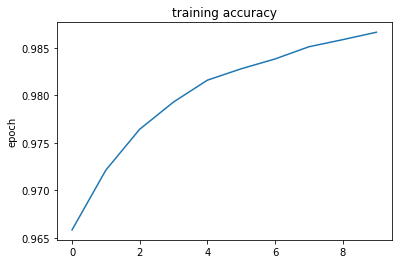

In [115]:
plt.plot(model_1.history["acc"])
plt.title("training accuracy")
plt.ylabel("accuracy")
plt.ylabel("epoch") #訓練次數
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])